## **1. Dataset Exploration**
In the following we will analyse the dataset used for our research. This allows proper pre-processing and a sound research design enabling meaningful insights. 
The primary aim is to understand the structure of each dataset, which allows us to unify them to construct the final dataset, and to analyze the data distribution and characteristics, which enables efficient sampling. 

The dataset used for our research are: FinQA, ConFinQA, and FinDER.


In [ ]:
import json
import random
import os
import pandas as pd
from pathlib import Path

**Load and Inspect the Samples**

In [ ]:
# Import necessary libraries
import sys
sys.path.append('../src')

#### FinQA

In [ ]:
finQA_train_file = Path("data/FinQA/train.json")
with open(finQA_train_file, 'r') as f:
    finQA_train_data = json.load(f)

print(f"Loaded {len(finQA_train_data)} training examples")
print(f"Data type: {type(finQA_train_data)}")

Loaded 6251 training examples
Data type: <class 'list'>


In [4]:
# Inspect the structure of the first sample
finQA_first_sample = finQA_train_data[0]
print(f"Sample type: {type(finQA_first_sample)}")
print(f"Sample keys: {list(finQA_first_sample.keys())}")
print(f"Number of keys: {len(finQA_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['pre_text', 'post_text', 'filename', 'table_ori', 'table', 'qa', 'id', 'table_retrieved', 'text_retrieved', 'table_retrieved_all', 'text_retrieved_all']
Number of keys: 11


In [5]:
print(finQA_first_sample)

{'pre_text': ['interest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) .', 'if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million .', 'foreign currency exposure as more fully described in note 2i .', 'in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s .', 'dollar-based exposures by entering into forward foreign currency exchange contracts .', 'the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months .', 'currently , our largest foreign currency exposure is the euro , primarily because our european operations have the highest proportion of our local currency denominated expenses .', 'relative to foreign currency exposures existing at october 31 , 2009 and november 1 , 2008 , a 10% ( 10 % )

In [6]:
# Detailed inspection of the first sample
for key, value in finQA_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 pre_text:
   Type: list (length: 15)
   First item type: <class 'str'>

📋 post_text:
   Type: list (length: 35)
   First item type: <class 'str'>

📋 filename:
   Type: string (length: 20)
   Preview: ADI/2009/page_49.pdf

📋 table_ori:
   Type: list (length: 4)
   First item type: <class 'list'>

📋 table:
   Type: list (length: 4)
   First item type: <class 'list'>

📋 qa:
   Type: dict (keys: ['question', 'answer', 'explanation', 'ann_table_rows', 'ann_text_rows', 'steps', 'program', 'gold_inds', 'exe_ans', 'tfidftopn', 'program_re', 'model_input'])

📋 id:
   Type: string (length: 22)
   Preview: ADI/2009/page_49.pdf-1

📋 table_retrieved:
   Type: list (length: 2)
   First item type: <class 'dict'>
   First item keys: ['score', 'ind']

📋 text_retrieved:
   Type: list (length: 3)
   First item type: <class 'dict'>
   First item keys: ['score', 'ind']

📋 table_retrieved_all:
   Type: list (length: 4)
   First item type: <class 'dict'>
   First item keys: ['score', 'ind']

📋 text_retrie

In [7]:
for col, value in finQA_first_sample.items():
    print(f"{col}: {value}\n")

pre_text: ['interest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) .', 'if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million .', 'foreign currency exposure as more fully described in note 2i .', 'in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s .', 'dollar-based exposures by entering into forward foreign currency exchange contracts .', 'the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months .', 'currently , our largest foreign currency exposure is the euro , primarily because our european operations have the highest proportion of our local currency denominated expenses .', 'relative to foreign currency exposures existing at october 31 , 2009 and november 1 , 2008 , a 10% ( 10 % ) un

**FinQA: Each training example is a dictionary with 11 keys:** <br>
"pre_text": the texts before the table; <br>
"post_text": the text after the table;<br>
"filename": name of the pdf file <br>
"table_ori": The original version of the table, as extracted from the document, before any preprocessing or normalization.<br>
"table": the table;<br>
"qa": {<br>
  "question": the question;<br>
  "answer": The final numeric/textual answer to the question.<br>
  "explenation": Optional human-written explanation for the answer (often empty in FinQA)<br>
  "ann_table_rows": Indices of table rows that are annotated as relevant (if the answer comes from a table).<br>
  "ann_text_rows": Indices of relevant text passages (e.g., [1] refers to text_1) from model_input.<br>
  "steps" ("op": operation, "arg1; arg2": operands; "res": result of the operation:  The symbolic execution steps used to compute the answer.<br>
  "program": the reasoning program;<br>
  "gold_inds": the gold supporting facts;<br>
  "exe_ans": the gold execution result;<br>
  "tfidftopn": Top-n retrieved text chunks using TF-IDF baseline.<br>
  "program_re": the reasoning program in nested format;<br>
  "model_input": A list of text chunks (tuples of text ID and content) used as input to the model.<br>
}<br>
"id": unique example id. <br>
"table_retrieved": A list of tables retrieved by a retriever model (e.g., BM25, DPR), each with a similarity score and ind (identifier).<br>
"text_retrieved": A list of retrieved text passages (usually from pre_text + post_text), sorted by similarity score.<br>
"table_retrieved_all": A complete list of table candidates along with their retrieval scores.<br>
"text_retrieved_all": All candidate text chunks (with scores), potentially from the whole document, ranked by relevance.<br>

#### ConvFinQA

In [ ]:
ConvfinQA_turn_train_file = Path("data/ConFinQA/train_turn.json")
with open(ConvfinQA_turn_train_file, 'r') as f: 
    ConvfinQA_turn_train_data = json.load(f)

print(f"Loaded {len(ConvfinQA_turn_train_data)} training examples")
print(f"Data type: {type(ConvfinQA_turn_train_data)}")

Loaded 11104 training examples
Data type: <class 'list'>


In [ ]:
ConvfinQA_train_file = Path("data/ConFinQA/train.json")
with open(ConvfinQA_train_file, 'r') as f:
    ConvfinQA_train_data = json.load(f)

print(f"Loaded {len(ConvfinQA_train_data)} training examples")
print(f"Data type: {type(ConvfinQA_train_data)}")

Loaded 3037 training examples
Data type: <class 'list'>


In [11]:
for i, sample in enumerate(ConvfinQA_turn_train_data[:5]):
    dialogue = sample.get("annotation", {}).get("dialogue_break", [])
    print(f"\nSample {i}: Dialogue length = {len(dialogue)}")
    print(dialogue)



Sample 0: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 1: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 2: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 3: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 4: Dialogue length = 4
['what were revenues in 2008?', 'what were they in 2007?', 'what was the net change?', 'what is the percent change?']


In [12]:
for i, sample in enumerate(ConvfinQA_train_data[:5]):
    dialogue = sample.get("annotation", {}).get("dialogue_break", [])
    print(f"\nSample {i}: Dialogue length = {len(dialogue)}")
    print(dialogue)


Sample 0: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 1: Dialogue length = 4
['what were revenues in 2008?', 'what were they in 2007?', 'what was the net change?', 'what is the percent change?']

Sample 2: Dialogue length = 4
['what was the total of net sales in 2001?', 'and what was that in 2000?', 'what was, then, the change in the total of net sales over the year?', 'and how much does this change represent in relation to that total in 2000, in percentage?']

Sample 3: Dialogue length = 6
['what was the change in the performance of the united parcel service inc . from 2004 to 2009?', 'and how much does this change represent in relation to that performance in 2004, in percentage?', 'what was the performance value of the s&p 500 index in 2009?', 'what was, then, the change in that performance from 2004 to 2009?', 'and how much does this change re

**train.json (Conversation-Level Format):** <br>
Each entry in this file represents a full multi-turn dialogue between a user and a system. It contains multiple interrelated QA pairs (dialogue_break) that often require the model to reason across dialogue history. This format is ideal for training and evaluating systems designed to handle conversational memory and context-aware reasoning.<br>
**train_turn.json (Turn-Level Format):**<br>
This version contains individual QA pairs, each treated as an independent training instance. While each turn includes metadata about the full dialogue (e.g., dialogue_break, turn_program), the structure is flattened to focus on single-turn question answering. It aligns closely with traditional QA datasets like FinQA and FinDER.<br>


The evaluation requires a unified dataset format that:<br>

- Ensures consistency across multiple QA datasets (FinQA, FinDER, ConvFinQA),
- Supports scalable benchmarking without additional engineering overhead,
- Enables clean input-output tracking across different RAG pipelines.<br>

The turn-level format (train_turn.json) satisfies these requirements by providing structurally uniform, self-contained QA pairs that are directly comparable to FinQA and FinDER. This consistency allows for streamlined preprocessing, batching, and evaluation across all models and datasets.<br>

Additionally, using the turn-level format avoids the added complexity of reconstructing dialogue context or implementing query-rewriting logic—an important consideration given the limited timeline of the project.<br>

To still account for conversational realism, a small subset of context-dependent examples from train.json may be used in a complementary analysis, providing qualitative insights into retriever performance under dialogue-aware conditions.<br>

In [13]:
# Inspect the structure of the first sample
ConvfinQA_first_sample = ConvfinQA_turn_train_data[0]
print(f"Sample type: {type(ConvfinQA_first_sample)}")
print(f"Sample keys: {list(ConvfinQA_first_sample.keys())}")
print(f"Number of keys: {len(ConvfinQA_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['pre_text', 'post_text', 'filename', 'table_ori', 'table', 'qa', 'id', 'annotation']
Number of keys: 8


In [15]:
# Detailed inspection of the first sample
for key, value in ConvfinQA_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 pre_text:
   Type: list (length: 9)
   First item type: <class 'str'>

📋 post_text:
   Type: list (length: 15)
   First item type: <class 'str'>

📋 filename:
   Type: string (length: 21)
   Preview: JKHY/2009/page_28.pdf

📋 table_ori:
   Type: list (length: 8)
   First item type: <class 'list'>

📋 table:
   Type: list (length: 7)
   First item type: <class 'list'>

📋 qa:
   Type: dict (keys: ['question', 'answer', 'explanation', 'ann_table_rows', 'ann_text_rows', 'steps', 'program', 'gold_inds', 'exe_ans', 'program_re'])

📋 id:
   Type: string (length: 32)
   Preview: Single_JKHY/2009/page_28.pdf-3_0

📋 annotation:
   Type: dict (keys: ['amt_table', 'amt_pre_text', 'amt_post_text', 'original_program', 'step_list', 'answer_list', 'dialogue_break', 'turn_program_ori', 'dialogue_break_ori', 'turn_program', 'qa_split', 'exe_ans_list', 'cur_program', 'cur_dial', 'exe_ans', 'cur_type', 'turn_ind', 'gold_ind'])


In [46]:
#inspect the first sample of convfinqa
for col, value in ConvfinQA_first_sample.items():
    print(f"{col}: {value}\n")


pre_text: ['26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 .', 'all revenue components within the segment experienced growth during fiscal 2008 .', 'license revenue generated the largest dollar growth in revenue as episys ae , our flagship core processing system aimed at larger credit unions , experienced strong sales throughout the year .', 'support and service revenue , which is the largest component of total revenues for the credit union segment , experienced 34 percent growth in eft support and 10 percent growth in in-house support .', 'gross profit in this business segment increased $ 9344 in fiscal 2008 compared to fiscal 2007 , due primarily to the increase in license revenue , which carries the highest margins .', 'liquidity and capital resources we have historically generated positive cash flow from operations and have generally used funds generated from operations and short-te

Distribution of 'turn_ind':
Turn 0: 3037 samples
Turn 1: 3031 samples
Turn 2: 2289 samples
Turn 3: 1632 samples
Turn 4: 795 samples
Turn 5: 234 samples
Turn 6: 67 samples
Turn 7: 17 samples
Turn 8: 2 samples


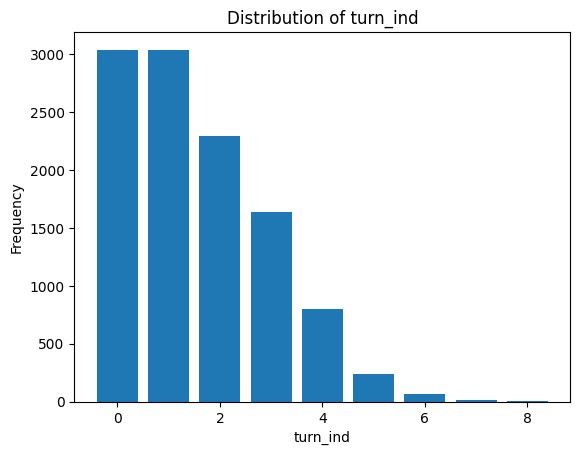

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract 'turn_ind' values 
turn_inds = [entry['annotation']['turn_ind'] for entry in ConvfinQA_turn_train_data if 'turn_ind' in entry['annotation']]

# Count frequency of each turn_ind value
counter = Counter(turn_inds)


print("Distribution of 'turn_ind':")
for k, v in sorted(counter.items()):
    print(f"Turn {k}: {v} samples")


plt.bar(counter.keys(), counter.values())
plt.xlabel('turn_ind')
plt.ylabel('Frequency')
plt.title('Distribution of turn_ind')
plt.show()


**ConvFinQA: Each training example is a dictionary with 8 keys:** <br>
"pre_text": the texts before the table; <br>
"post_text": the text after the table;<br>
"filename": name of the pdf file <br>
"table_ori": The original version of the table, as extracted from the document, before any preprocessing or normalization.<br>
"table": the table;<br>
"qa": {<br>
  "question": the question;<br>
  "answer": The final numeric/textual answer to the question.<br>
  "ann_table_rows": Indices of table rows that are annotated as relevant (if the answer comes from a table).<br>
  "ann_text_rows": Indices of relevant text passages (e.g., [1] refers to text_1) from model_input.<br>
  "steps" ("op": operation, "arg1; arg2": operands; "res": result of the operation:  The symbolic execution steps used to compute the answer.<br>
  "program": the reasoning program;<br>
  "gold_inds": the gold supporting facts;<br>
  "exe_ans": the execution results of each question turn. ;<br>
}<br>
"id": unique example id. <br>
"annotation": {<br>
  "original_program": original FinQA question;<br>
  "dialogue_break": the conversation, as a list of question turns. <br>
  "turn_program": the ground truth program for each question, corresponding to the list in "dialogue_break".<br>
  "cur_pogram":Current program for this turn.<br>
  "cur_dial":Current dialogue turn.<br>
  "gold_ind": Highlighted content for evidence.<br>
  "turn_ind": Index of this turn in the full dialogue.<br>
  "exe_ans_list": the execution results of each question turn. <br>
}<br>

#### FinDER

In [ ]:
import json
from pathlib import Path

finder_train_file = Path("data/FinDER/train.jsonl")
finder_train_data = []
with open(finder_train_file, 'r') as f:
    for line in f:
        finder_train_data.append(json.loads(line))

print(f"Loaded {len(finder_train_data)} training examples")
print(f"Data type: {type(finder_train_data)}")

Loaded 5703 training examples
Data type: <class 'list'>


In [18]:
# Inspect the structure of the first sample
finder_first_sample = finder_train_data[0]
print(f"Sample type: {type(finder_first_sample)}")
print(f"Sample keys: {list(finder_first_sample.keys())}")
print(f"Number of keys: {len(finder_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['_id', 'text', 'reasoning', 'category', 'references', 'answer', 'type']
Number of keys: 7


In [19]:
print(finder_train_data[0])

{'_id': 'b33fcee7', 'text': 'Delta in CBOE Data & Access Solutions rev from 2021-23.', 'reasoning': True, 'category': 'Financials', 'references': ['Cboe Global Markets, Inc. and Subsidiaries\n\nConsolidated Statements of Income\n\nYears ended December 31, 2023, 2022, and 2021\n\n(In millions, except per share data)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n2023\n\n    \n\n2022\n\n    \n\n2021\n\n \n\nRevenues:\n\n\n\n\n\n\n\n\n\n\n\nCash and spot markets\n\n\n$\n\n1,445.1\n\n\n$\n\n1,777.6\n\n\n$\n\n1,660.5\n\n\nData and access solutions\n\n\n\n539.2\n\n\n\n497.0\n\n\n\n427.7\n\n\nDerivatives markets\n\n\n \n\n1,789.2\n\n\n \n\n1,683.9\n\n\n \n\n1,406.6\n\n\nTotal revenues\n\n\n \n\n3,773.5\n\n\n \n\n3,958.5\n\n\n \n\n3,494.8\n\n\nCost of revenues:\n\n\n\n\n\n\n\n\n\n\n\n  Liquidity payments\n\n\n \n\n1,385.8\n\n\n \n\n1,670.2\n\n\n \n\n1,650.7\n\n\n  Routing and clearing\n\n\n\n79.1\n\n\n\n83.2\n\n\n\n87.8\n\n\n  Section 31 fees\n\n\n\n185.7\n\n\n\n329.8\n\n\n\n179.6\n\n\n  Royalty fees an

In [20]:
# Detailed inspection of the first sample
for key, value in finder_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 _id:
   Type: string (length: 8)
   Preview: b33fcee7

📋 text:
   Type: string (length: 55)
   Preview: Delta in CBOE Data & Access Solutions rev from 2021-23.

📋 reasoning:
   Type: <class 'bool'>
   Value: True

📋 category:
   Type: string (length: 10)
   Preview: Financials

📋 references:
   Type: list (length: 1)
   First item type: <class 'str'>

📋 answer:
   Type: string (length: 133)
   Preview: The Data and Access Solutions revenue increased by $111.5 million from 2021 to 2023, calculated as 5...

📋 type:
   Type: string (length: 8)
   Preview: Subtract


**FinDER: Each training example is a dictionary with 7 keys:** <br>
"id": unique identifier.<br>
"text": query that the model is expected to answer.<br>
"reasoning": ndicates whether the question requires reasoning (e.g. logical inference, arithmetic operations) rather than simple lookup. true = reasoning required.<br>
"category": The semantic category of the question (e.g., Financials, Company overview, Footnotes, etc.).<br>
"references": The source text passages (e.g., extracted from tables or footnotes) that the model should consider when answering the question. <br>
"answer": The reference answer that the model should produce.<br>
"types": Indicates the type of reasoning required to arrive at the answer. <br>


## **2. Construct the final dataset**<br>
Since the original datasets are of varying structures we will in the following create a canonical schema to avoid confounds and log identical signals across runs. It'll contain only the fields that are relevant for retrieval, answer checking , and analysis. The goal is to construct a dataset where each row can be fed straight into the each of the RAG models with no dataset-specific branches. <br>



The final dataset has the following structure: <br>

{
  "ID"          : "string", <br>
  "source"      : "FinQA | ConvFinQA | FinDER",<br>
  "question"     : "string",<br>
  "answer"       : "string",  <br>
  "context" : ["string"],   // list of text passages and tables <br>
  "operation"  : "string", <br>
  "gold_context" : ["string"],   <br>
}

#### **2.1 Preprocess datasets**

##### 2.1.1 FinQA

We sentence-split each pre_text/post_text, then concatenate adjacent sentences until the segment is ≤ 100 BPE tokens. This follows best practice in prior RAG work (Lewis 2020; Izacard 2021) and balances retrieval precision with embedding quality.

In [ ]:
df_finqa = pd.read_json("data/FinQA/train.json")

In [ ]:
for i, qa_dict in enumerate(df_finqa['qa'][:5]):
    print(f"Sample {i+1} program:", qa_dict.get("program", ""))

Sample 1 program: divide(100, 100), divide(3.8, #0)
Sample 2 program: multiply(607, 18.13), multiply(#0, const_1000), multiply(3.3, const_1000000), greater(#1, #2)
Sample 3 program: divide(9896, 23.6%)
Sample 4 program: divide(14001, 26302)
Sample 5 program: subtract(959.2, 991.1), divide(#0, 991.1)


In [ ]:
import random
project_root = Path('/Users/christel/Desktop/Thesis/thesis_repo') 
sys.path.append(str(project_root))
from src.data_utils import transform_finqa_dataset

/Users/christel/Desktop/Thesis/thesis_repo/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
with open("data/FinQA/train.json") as f:
    finqa_data = json.load(f)

transformed_finqa_data = transform_finqa_dataset(finqa_data)

In [32]:
for k, v in transformed_finqa_data[0].items():
    print(f"{k}: {v}\n")

ID: ADI/2009/page_49.pdf

question: what is the the interest expense in 2009?

answer: 380

context: ['interest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) .', 'if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million .', 'foreign currency exposure as more fully described in note 2i .', 'in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s .', 'dollar-based exposures by entering into forward foreign currency exchange contracts .', 'the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months .', 'currently , our largest foreign currency exposure is the euro , primarily because our european operations have the highest proportion of our local currency denominated expenses .', 'relative to foreign

In [34]:
df_finqa = pd.DataFrame(transformed_finqa_data)

# check for missing values
df_finqa.head(2)

ID  \
0   ADI/2009/page_49.pdf   
1  ABMD/2012/page_75.pdf   

                                                                                                                                                                                     question  \
0                                                                                                                                                   what is the the interest expense in 2009?   
1  during the 2012 year , did the equity awards in which the prescribed performance milestones were achieved exceed the equity award compensation expense for equity granted during the year?   

  answer  \
0    380   
1          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [35]:
print("Check for missing or empty values per column:\n")
print(f"Number of rows: {len(df_finqa)}")

for column in df_finqa.columns:
    # Check for NaN/None using isnull()
    null_count = df_finqa[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if df_finqa[column].dtype == 'object':
        empty_string_count = (df_finqa[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")


Check for missing or empty values per column:

Number of rows: 6251
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer':
  - Null/NaN values: 0
  - Empty strings ('') values: 48
  - Total missing/empty: 48

Column 'context': Clean (0 missing or empty values)
Column 'gold_context': Clean (0 missing or empty values)
Column 'operation': Clean (0 missing or empty values)


Drop all rows where data is missing

In [36]:
finqa_cleaned = df_finqa[~(df_finqa['answer'].isnull() | (df_finqa['answer'] == ''))].copy()

finqa_cleaned.reset_index(drop=True, inplace=True)
print(f"Rows before dropping missing answers: {len(df_finqa)}")
print(f"Rows after dropping missing answers: {len(finqa_cleaned)}")

Rows before dropping missing answers: 6251
Rows after dropping missing answers: 6203


##### 2.1.2 ConvFinQa

In [37]:
from pathlib import Path 
project_root = Path('/Users/christel/Desktop/Thesis/thesis_repo')  
sys.path.append(str(project_root))

from src.data_utils import transform_convfinqa_dataset

In [ ]:
with open("data/ConFinQA/train_turn.json") as f:
    convfinqa_data = json.load(f)

transformed_convfinqa_data = transform_convfinqa_dataset(convfinqa_data)

In [42]:
for k, v in transformed_convfinqa_data[7].items():
    print(f"{k}: {v}\n")

ID: RSG/2008/page_114.pdf

question: Q: what were revenues in 2008?
A: 9362.2
Q: what were they in 2007?
A: 9244.9
Q: what was the net change?
A: A0
Q: what is the percent change?

answer: 1.3%

context: substantially all of the goodwill and other intangible assets recorded related to the acquisition of allied are not deductible for tax purposes . pro forma information the consolidated financial statements presented for republic include the operating results of allied from the date of the acquisition . the following pro forma information is presented assuming the merger had been completed as of january 1 , 2007 . the unaudited pro forma information presented below has been prepared for illustrative purposes and is not intended to be indicative of the results of operations that would have actually occurred had the acquisition been consummated at the beginning of the periods presented or of future results of the combined operations ( in millions , except share and per share amounts ) . y

In [44]:
df_convfinqa = pd.DataFrame(transformed_convfinqa_data)

In [45]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(df_convfinqa)}")

for column in df_convfinqa.columns:
    # Check for NaN/None using isnull()
    null_count = df_convfinqa[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if df_convfinqa[column].dtype == 'object':
        empty_string_count = (df_convfinqa[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")


Comprehensive check for missing or empty values per column:

Number of rows: 11104
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer':
  - Null/NaN values: 0
  - Empty strings ('') values: 3712
  - Total missing/empty: 3712

Column 'context': Clean (0 missing or empty values)
Column 'gold_context': Clean (0 missing or empty values)
Column 'operation':
  - Null/NaN values: 0
  - Empty strings ('') values: 3642
  - Total missing/empty: 3642

Column 'turn_ind': Clean (0 missing or empty values)


In [ ]:
print("Comprehensive check for missing or empty answers in original ConvFinQA data:\n")

# Count total rows
total_samples = len(ConvfinQA_train_data)
print(f"Number of samples: {total_samples}\n")

# Initialize counters
missing_answer_count = 0
non_missing_answer_count = 0
missing_by_key = {"qa.answer": 0, "annotation.answer_list": 0}

# Iterate over each sample
for sample in ConvfinQA_train_data:
    qa_dict = sample.get("qa", {})
    ann_dict = sample.get("annotation", {})

    # Extract the direct qa['answer']
    direct_answer = qa_dict.get("answer", "")
    if isinstance(direct_answer, str):
        direct_answer = direct_answer.strip()

    # Extract from answer_list if available
    answers_list = ann_dict.get("answer_list", [])
    turn_ind = ann_dict.get("turn_ind", 0)
    answer_from_list = ""
    if isinstance(answers_list, list) and 0 <= turn_ind < len(answers_list):
        answer_from_list = str(answers_list[turn_ind]).strip()

    # Determine if answer is missing
    if not direct_answer and not answer_from_list:
        missing_answer_count += 1
        if not direct_answer:
            missing_by_key["qa.answer"] += 1
        if not answer_from_list:
            missing_by_key["annotation.answer_list"] += 1
    else:
        non_missing_answer_count += 1

print(f"Samples with missing answers: {missing_answer_count}")
print(f"Samples with answers present: {non_missing_answer_count}")
print(f"Percentage missing: {missing_answer_count / total_samples * 100:.2f}%\n")

print("Breakdown of missing by source key:")
for key, count in missing_by_key.items():
    print(f"  {key}: {count}")

Comprehensive check for missing or empty answers in original ConvFinQA data:

Number of samples: 3037

Samples with missing answers: 0
Samples with answers present: 3037
Percentage missing: 0.00%

Breakdown of missing by source key:
  qa.answer: 0
  annotation.answer_list: 0


In [ ]:
# Replace empty strings with NaN
convfinqa_cleaned = df_convfinqa.replace('', pd.NA)

# Drop any row that has at least one NaN (including ones that were empty strings)
convfinqa_cleaned = convfinqa_cleaned.dropna(how='any')

convfinqa_cleaned.reset_index(drop=True, inplace=True)
print(f"Rows before cleaning: {len(df_convfinqa)}")
print(f"Rows after dropping rows with any missing/empty values: {len(convfinqa_cleaned)}")


Rows before cleaning: 11104
Rows after dropping rows with any missing/empty values: 7392


In [77]:
convfinqa_cleaned2 = convfinqa_cleaned[convfinqa_cleaned['turn_ind'] > 0].copy()
print(f"Rows after dropping rows with any missing/empty values: {len(convfinqa_cleaned)}")
print(f"Rows after dropping rows with no conversation history: {len(convfinqa_cleaned2)}")

Rows after dropping rows with any missing/empty values: 7392
Rows after dropping rows with no conversation history: 5302


In [78]:
convfinqa_cleaned2.drop(columns=["turn_ind"], inplace=True)

In [79]:
convfinqa_cleaned2.head(2)

ID  \
1  JKHY/2009/page_28.pdf   
2  JKHY/2009/page_28.pdf   

                                                                                                                               question  \
1                                         Q: what is the net cash from operating activities in 2009?\nA: 206588\nQ: what about in 2008?   
2  Q: what is the net cash from operating activities in 2009?\nA: 206588\nQ: what about in 2008?\nA: 181001\nQ: what is the difference?   

  answer  \
1  14.1%   
2  14.1%   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [55]:
print(f"Rows after dropping rows with no conversation history: {len(convfinqa_cleaned2)}")

Rows after dropping rows with no conversation history: 5302


In [56]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(convfinqa_cleaned2)}")

for column in convfinqa_cleaned2.columns:
    # Check for NaN/None using isnull()
    null_count = convfinqa_cleaned2[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if convfinqa_cleaned2[column].dtype == 'object':
        empty_string_count = (convfinqa_cleaned2[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")

Comprehensive check for missing or empty values per column:

Number of rows: 5302
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer': Clean (0 missing or empty values)
Column 'context': Clean (0 missing or empty values)
Column 'gold_context': Clean (0 missing or empty values)
Column 'operation': Clean (0 missing or empty values)


##### 2.1.3 FinDER

In [ ]:
from pathlib import Path 
project_root = Path('/Users/christel/Desktop/Thesis/thesis_repo')  
sys.path.append(str(project_root))

from src.data_utils import transform_finder_dataset

In [64]:
def transform_finder_dataset(finder_data):
    """
    Transforms FinDER dataset into a unified format for RAG evaluation.

    Args:
        finder_data (list of dict): The original FinDER dataset.

    Returns:
        list of dict: Transformed dataset.
    """
    transformed = []
    for sample in finder_data:
        transformed.append({
            "ID": sample.get("_id", ""),
            "question": sample.get("text", ""),
            "answer": sample.get("answer", ""),
            "context": sample.get("references", ""),
            "gold_context": "",  # Empty as FinDER has no gold context
            "operation": sample.get("type", "")
        })
    return transformed


In [ ]:
import json

finder_data = []
with open('data/FinDER/train.jsonl', 'r') as f:
    for line in f:
        finder_data.append(json.loads(line))

In [66]:
finder_transformed = transform_finder_dataset(finder_data)
df_finder = pd.DataFrame(finder_transformed)

In [68]:
df_finder.head(2)

,ID,question,answer,context,gold_context,operation
0,b33fcee7,Delta in CBOE Data & Access Solutions rev from 2021-23.,"The Data and Access Solutions revenue increased by $111.5 million from 2021 to 2023, calculated as 539.2 million minus 427.7 million.","[Cboe Global Markets, Inc. and Subsidiaries\n\nConsolidated Statements of Income\n\nYears ended December 31, 2023, 2022, and 2021\n\n(In millions, except per share data)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n2023\n\n \n\n2022\n\n \n\n2021\n\n \n\nRevenues:\n\n\n\n\n\n\n\n\n\n\n\nCash and spot markets\n\n\n$\n\n1,445.1\n\n\n$\n\n1,777.6\n\n\n$\n\n1,660.5\n\n\nData and access solutions\n\n\n\n539.2\n\n\n\n497.0\n\n\n\n427.7\n\n\nDerivatives markets\n\n\n \n\n1,789.2\n\n\n \n\n1,683.9\n\n\n \n\n1,406.6\n\n\nTotal revenues\n\n\n \n\n3,773.5\n\n\n \n\n3,958.5\n\n\n \n\n3,494.8\n\n\nCost of revenues:\n\n\n\n\n\n\n\n\n\n\n\n Liquidity payments\n\n\n \n\n1,385.8\n\n\n \n\n1,670.2\n\n\n \n\n1,650.7\n\n\n Routing and clearing\n\n\n\n79.1\n\n\n\n83.2\n\n\n\n87.8\n\n\n Section 31 fees\n\n\n\n185.7\n\n\n\n329.8\n\n\n\n179.6\n\n\n Royalty fees and other cost of revenues\n\n\n \n\n204.9\n\n\n \n\n133.6\n\n\n \n\n100.6\n\n\nTotal cost of revenues\n\n\n \n\n1,855.5\n\n\n \n\n2,216.8\n\n\n \n\n2,018.7\n\n\nRevenues less cost of revenues\n\n\n \n\n1,918.0\n\n\n \n\n1,741.7\n\n\n \n\n1,476.1\n\n\nOperating expenses:\n\n\n\n\n\n\n\n\n\n\n\n Compensation and benefits\n\n\n \n\n425.8\n\n\n \n\n363.0\n\n\n \n\n288.5\n\n\n Depreciation and amortization\n\n\n \n\n158.0\n\n\n \n\n166.8\n\n\n \n\n167.4\n\n\n Technology support services\n\n\n \n\n99.7\n\n\n \n\n77.7\n\n\n \n\n66.7\n\n\n Professional fees and outside services\n\n\n \n\n92.0\n\n\n \n\n89.0\n\n\n \n\n83.7\n\n\n Travel and promotional expenses\n\n\n \n\n37.6\n\n\n \n\n23.7\n\n\n \n\n9.7\n\n\n Facilities costs\n\n\n \n\n25.7\n\n\n \n\n25.1\n\n\n \n\n22.2\n\n\n Acquisition-related costs\n\n\n \n\n7.4\n\n\n \n\n19.9\n\n\n \n\n15.6\n\n\n Goodwill impairment\n\n\n\n—\n\n\n\n460.9\n\n\n\n—\n\n\n Other expenses\n\n\n\n13.9\n\n\n\n26.0\n\n\n\n16.4\n\n\nTotal operating expenses\n\n\n \n\n860.1\n\n\n \n\n1,252.1\n\n\n \n\n670.2\n\n\nOperating income\n\n\n \n\n1,057.9\n\n\n \n\n489.6\n\n\n \n\n805.9\n\n\nNon-operating (expenses) income:\n\n\n\n\n\n\n\n\n\n\n\nInterest expense\n\n\n \n\n(62.4)\n\n\n\n(60.0)\n\n\n\n(48.0)\n\n\nInterest income\n\n\n\n12.0\n\n\n\n3.6\n\n\n\n0.6\n\n\nEarnings in investments\n\n\n\n39.5\n\n\n\n7.2\n\n\n\n1.0\n\n\nOther income (expense), net\n\n\n \n\n0.6\n\n\n \n\n(7.5)\n\n\n \n\n(3.4)\n\n\nIncome before income tax provision\n\n\n \n\n1,047.6\n\n\n \n\n432.9\n\n\n \n\n756.1\n\n\nIncome tax provision\n\n\n \n\n286.2\n\n\n \n\n197.9\n\n\n \n\n227.1\n\n\nNet income\n\n\n\n761.4\n\n\n\n235.0\n\n\n\n529.0\n\n\nNet income allocated to participating securities\n\n\n\n(3.9)\n\n\n\n(0.9)\n\n\n\n(1.7)\n\n\nNet income allocated to common stockholders\n\n\n$\n\n757.5\n\n\n$\n\n234.1\n\n\n$\n\n527.3\n\n\nBasic earnings per share\n\n\n$\n\n7.16\n\n\n$\n\n2.20\n\n\n$\n\n4.93\n\n\nDiluted earnings per share\n\n\n$\n\n7.13\n\n\n$\n\n2.19\n\n\n$\n\n4.92\n\n\n\n\n\n\n\n\n\n\n\n\n\nBasic weighted average shares outstanding\n\n\n\n105.8\n\n\n\n106.3\n\n\n\n107.0\n\n\nDiluted weighted average shares outstanding\n\n\n\n106.2\n\n\n\n106.7\n\n\n\n107.2]",,Subtract
1,b8a1383c,CBOE CBA expiring may impact union representation expenses.,"The three building engineers represent approximately 0.18% of the total workforce (calculated as 3 ÷ 1,647 × 100 ≈ 0.18%). Although this is a very small portion of overall employees, the impending expiration of their collective bargaining agreement (set to expire on March 31, 2024) is noteworthy for future expense planning. When the contract expires, there could be negotiations for new terms, which might include higher wages, enhanced benefits, or changes in other employment conditions. Such changes, though impacting only a small group, could lead to an increase in labor costs. Therefore, management should consider potentia

In [69]:
print("Comprehensive check for missing or empty values per column:\n")
print(f"Number of rows: {len(df_finder)}")

for column in df_finder.columns:
    # Check for NaN/None using isnull()
    null_count = df_finder[column].isnull().sum()
    
    # Check for empty strings, but only if the column is of a string/object type
    empty_string_count = 0
    if df_finder[column].dtype == 'object':
        empty_string_count = (df_finder[column] == '').sum()
        
    # Calculate total "missing" or "empty"
    total_missing = null_count + empty_string_count
    
    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Null/NaN values: {null_count}")
        print(f"  - Empty strings ('') values: {empty_string_count}")
        print(f"  - Total missing/empty: {total_missing}\n")
    else:
        print(f"Column '{column}': Clean (0 missing or empty values)")


Comprehensive check for missing or empty values per column:

Number of rows: 5703
Column 'ID': Clean (0 missing or empty values)
Column 'question': Clean (0 missing or empty values)
Column 'answer':
  - Null/NaN values: 0
  - Empty strings ('') values: 7
  - Total missing/empty: 7

Column 'context': Clean (0 missing or empty values)
Column 'gold_context':
  - Null/NaN values: 0
  - Empty strings ('') values: 5703
  - Total missing/empty: 5703

Column 'operation': Clean (0 missing or empty values)


In [70]:
finder_cleaned = df_finder[df_finder["answer"] != ""].copy()

In [71]:
print(f"Before: {len(df_finder)} rows")
print(f"After : {len(finder_cleaned)} rows (empty answers removed)")

Before: 5703 rows
After : 5696 rows (empty answers removed)


In [ ]:
# Save cleaned data 
finqa_cleaned.to_json("data/data_processed/finqa_processed.json", orient="records", lines=True)
convfinqa_cleaned2.to_json("data/data_processed/convfinqa_processed.json", orient="records", lines=True)
finder_cleaned.to_json("data/data_processed/finder_processed.json", orient="records", lines=True)

#### 2.2 Compare FinQA and ConvFinQA


Find unique questions in both datasets

In [81]:
finqa_qas = set(
    (row.question.strip().lower(), row.answer.strip().lower())
    for row in finqa_cleaned.itertuples()
)

convfinqa_qas = set(
    (row.question.strip().lower(), row.answer.strip().lower())
    for row in convfinqa_cleaned2.itertuples()
)

In [82]:
only_in_finqa = finqa_qas - convfinqa_qas
only_in_convfinqa = convfinqa_qas - finqa_qas
in_both = finqa_qas & convfinqa_qas

print(f"Unique to FinQA: {len(only_in_finqa)}")
print(f"Unique to ConvFinQA: {len(only_in_convfinqa)}")
print(f"Shared between both: {len(in_both)}")

Unique to FinQA: 6142
Unique to ConvFinQA: 5299
Shared between both: 0


In [83]:
#length of all three datasets
print(f"FinQA length: {len(finqa_cleaned)}")
print(f"ConvFinQA length: {len(convfinqa_cleaned2)}")
print(f"FinDER length: {len(finder_cleaned)}")

FinQA length: 6203
ConvFinQA length: 5302
FinDER length: 5696


In [84]:
print(finqa_cleaned.columns)
print(convfinqa_cleaned2.columns)
print(finder_cleaned.columns)

Index(['ID', 'question', 'answer', 'context', 'gold_context', 'operation'], dtype='object')
Index(['ID', 'question', 'answer', 'context', 'gold_context', 'operation'], dtype='object')
Index(['ID', 'question', 'answer', 'context', 'gold_context', 'operation'], dtype='object')


#### 2.3 Merge Datasets 

In [86]:
# Add source columns
finqa_cleaned["source"] = "FinQA"
convfinqa_cleaned2["source"] = "ConvFinQA"
finder_cleaned["source"] = "FinDER"


finder_cleaned.head(2)

,ID,question,answer,context,gold_context,operation,source
0,b33fcee7,Delta in CBOE Data & Access Solutions rev from 2021-23.,"The Data and Access Solutions revenue increased by $111.5 million from 2021 to 2023, calculated as 539.2 million minus 427.7 million.","[Cboe Global Markets, Inc. and Subsidiaries\n\nConsolidated Statements of Income\n\nYears ended December 31, 2023, 2022, and 2021\n\n(In millions, except per share data)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n2023\n\n \n\n2022\n\n \n\n2021\n\n \n\nRevenues:\n\n\n\n\n\n\n\n\n\n\n\nCash and spot markets\n\n\n$\n\n1,445.1\n\n\n$\n\n1,777.6\n\n\n$\n\n1,660.5\n\n\nData and access solutions\n\n\n\n539.2\n\n\n\n497.0\n\n\n\n427.7\n\n\nDerivatives markets\n\n\n \n\n1,789.2\n\n\n \n\n1,683.9\n\n\n \n\n1,406.6\n\n\nTotal revenues\n\n\n \n\n3,773.5\n\n\n \n\n3,958.5\n\n\n \n\n3,494.8\n\n\nCost of revenues:\n\n\n\n\n\n\n\n\n\n\n\n Liquidity payments\n\n\n \n\n1,385.8\n\n\n \n\n1,670.2\n\n\n \n\n1,650.7\n\n\n Routing and clearing\n\n\n\n79.1\n\n\n\n83.2\n\n\n\n87.8\n\n\n Section 31 fees\n\n\n\n185.7\n\n\n\n329.8\n\n\n\n179.6\n\n\n Royalty fees and other cost of revenues\n\n\n \n\n204.9\n\n\n \n\n133.6\n\n\n \n\n100.6\n\n\nTotal cost of revenues\n\n\n \n\n1,855.5\n\n\n \n\n2,216.8\n\n\n \n\n2,018.7\n\n\nRevenues less cost of revenues\n\n\n \n\n1,918.0\n\n\n \n\n1,741.7\n\n\n \n\n1,476.1\n\n\nOperating expenses:\n\n\n\n\n\n\n\n\n\n\n\n Compensation and benefits\n\n\n \n\n425.8\n\n\n \n\n363.0\n\n\n \n\n288.5\n\n\n Depreciation and amortization\n\n\n \n\n158.0\n\n\n \n\n166.8\n\n\n \n\n167.4\n\n\n Technology support services\n\n\n \n\n99.7\n\n\n \n\n77.7\n\n\n \n\n66.7\n\n\n Professional fees and outside services\n\n\n \n\n92.0\n\n\n \n\n89.0\n\n\n \n\n83.7\n\n\n Travel and promotional expenses\n\n\n \n\n37.6\n\n\n \n\n23.7\n\n\n \n\n9.7\n\n\n Facilities costs\n\n\n \n\n25.7\n\n\n \n\n25.1\n\n\n \n\n22.2\n\n\n Acquisition-related costs\n\n\n \n\n7.4\n\n\n \n\n19.9\n\n\n \n\n15.6\n\n\n Goodwill impairment\n\n\n\n—\n\n\n\n460.9\n\n\n\n—\n\n\n Other expenses\n\n\n\n13.9\n\n\n\n26.0\n\n\n\n16.4\n\n\nTotal operating expenses\n\n\n \n\n860.1\n\n\n \n\n1,252.1\n\n\n \n\n670.2\n\n\nOperating income\n\n\n \n\n1,057.9\n\n\n \n\n489.6\n\n\n \n\n805.9\n\n\nNon-operating (expenses) income:\n\n\n\n\n\n\n\n\n\n\n\nInterest expense\n\n\n \n\n(62.4)\n\n\n\n(60.0)\n\n\n\n(48.0)\n\n\nInterest income\n\n\n\n12.0\n\n\n\n3.6\n\n\n\n0.6\n\n\nEarnings in investments\n\n\n\n39.5\n\n\n\n7.2\n\n\n\n1.0\n\n\nOther income (expense), net\n\n\n \n\n0.6\n\n\n \n\n(7.5)\n\n\n \n\n(3.4)\n\n\nIncome before income tax provision\n\n\n \n\n1,047.6\n\n\n \n\n432.9\n\n\n \n\n756.1\n\n\nIncome tax provision\n\n\n \n\n286.2\n\n\n \n\n197.9\n\n\n \n\n227.1\n\n\nNet income\n\n\n\n761.4\n\n\n\n235.0\n\n\n\n529.0\n\n\nNet income allocated to participating securities\n\n\n\n(3.9)\n\n\n\n(0.9)\n\n\n\n(1.7)\n\n\nNet income allocated to common stockholders\n\n\n$\n\n757.5\n\n\n$\n\n234.1\n\n\n$\n\n527.3\n\n\nBasic earnings per share\n\n\n$\n\n7.16\n\n\n$\n\n2.20\n\n\n$\n\n4.93\n\n\nDiluted earnings per share\n\n\n$\n\n7.13\n\n\n$\n\n2.19\n\n\n$\n\n4.92\n\n\n\n\n\n\n\n\n\n\n\n\n\nBasic weighted average shares outstanding\n\n\n\n105.8\n\n\n\n106.3\n\n\n\n107.0\n\n\nDiluted weighted average shares outstanding\n\n\n\n106.2\n\n\n\n106.7\n\n\n\n107.2]",,Subtract,FinDER
1,b8a1383c,CBOE CBA expiring may impact union representation expenses.,"The three building engineers represent approximately 0.18% of the total workforce (calculated as 3 ÷ 1,647 × 100 ≈ 0.18%). Although this is a very small portion of overall employees, the impending expiration of their collective bargaining agreement (set to expire on March 31, 2024) is noteworthy for future expense planning. When the contract expires, there could be negotiations for new terms, which might include higher wages, enhanced benefits, or changes in other employment conditions. Such changes, though impacting only a small group, could lead to an increase in labor costs. Therefore, management should con

In [ ]:
# Merge all datasets
combined_df = pd.concat(
    [finqa_cleaned, convfinqa_cleaned2, finder_cleaned],
    axis=0,
    ignore_index=True
)

print(combined_df["source"].value_counts())
print(combined_df.head())

source
FinQA        6203
FinDER       5696
ConvFinQA    5302
Name: count, dtype: int64
                      ID  \
0   ADI/2009/page_49.pdf   
1   AAL/2018/page_13.pdf   
2  INTC/2013/page_71.pdf   
3  ETR/2008/page_313.pdf   
4    C/2010/page_272.pdf   

                                                                                                             question  \
0                                                                           what is the the interest expense in 2009?   
1                                                           what was the total operating expenses in 2018 in millions   
2  what percentage of total cash and investments as of dec . 29 2012 was comprised of available-for-sale investments?   
3                                                                     what is the growth rate in net revenue in 2008?   
4                     what was the growth rate of the loans held-for-sale that are carried at locom from 2009 to 2010   

   answer  \
0   

In [88]:
print(len(combined_df))

17201


In [89]:
print(combined_df.isnull().sum())

ID              0
question        0
answer          0
context         0
gold_context    0
operation       0
source          0
dtype: int64


In [90]:
print("Rows with any missing value:", combined_df.isnull().any(axis=1).sum())

Rows with any missing value: 0


In [91]:
print((combined_df == None).sum())

ID              0
question        0
answer          0
context         0
gold_context    0
operation       0
source          0
dtype: int64


In [92]:
unique_reason_types = combined_df['operation'].dropna().unique().tolist()
print(unique_reason_types)

['divide(100, 100), divide(3.8, #0)', 'divide(9896, 23.6%)', 'divide(14001, 26302)', 'subtract(959.2, 991.1), divide(#0, 991.1)', 'divide(2.5, 1.6), divide(#0, 1.6)', 'add(75.0, 72.7), divide(#0, 20)', 'divide(1786.2, 2807.0)', 'subtract(34.8, 1.2), divide(#0, 34.8), multiply(#1, const_100)', 'multiply(1327657, 42.61), divide(#0, const_1000000)', 'subtract(2309.9, 2303.0)', 'divide(1733, 2655)', 'subtract(440.9, 442.3), divide(#0, 442.3)', 'divide(1947, 7018)', 'divide(1733, 2640)', 'divide(37788, 186792)', 'divide(726.6, 6039.0)', 'divide(const_3, 83)', 'divide(439, 470)', 'divide(12, 261)', 'subtract(10, 12), divide(#0, 12)', 'subtract(35764, 22176)', 'subtract(15, 8)', 'divide(303, 304)', 'divide(7991, 21367)', 'subtract(23.59, 28.37), divide(#0, 28.37)', 'subtract(14.6%, 13.0%)', 'subtract(78.0, 75.3), subtract(58.0, 49.9), subtract(54.0, 51.8), add(#0, #1), add(#2, #3)', 'add(2.1, 0.7), add(#0, 0.1), divide(#1, const_3)', 'subtract(1680, 1747), divide(#0, 1747)', 'table_average(20

In [ ]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

In [ ]:
df_reason_none = combined_df[combined_df['operation']=="None"]

df_reason_none.head()

,ID,question,answer,context,gold_context,operation,source
11507,9826209b,Cboe's earnings impact from market data vs reg...,The data provided shows that Cboe Global Marke...,[North\n\n\n\n\n\n\n\n\n\n\nCorporate\n\n\n\n\...,,None,FinDER
11508,30eb0cd9,Cboe’s repurchase costs & the impact of its au...,The available data on share repurchase activit...,"[In 2011, the Board of Directors approved an i...",,None,FinDER
11509,1a4cebce,"Cboe's operational stability, governance in cy...",Cboe Global Markets Inc.'s multi-layered cyber...,"[We maintain policies, procedures and controls...",,None,FinDER
11510,dd6f1e96,Fee model of Cboe incentivizes order flow liqu...,The provided text indicates that Cboe Global M...,[Competition\n\nThe industry in which we opera...,,None,FinDER
11511,a8300795,Cboe's legal proceedings and loss accrual crit...,Cboe Global Markets Inc. categorizes its legal...,"[Legal Proceedings\n\nAs of December 31, 2023,...",,None,FinDER


In [95]:
# Calculate the length of context_text for each row
context_lengths = combined_df['context'].apply(len)

# Find the minimum and maximum
min_context = context_lengths.min()
max_context = context_lengths.max()

print(f"Minimum context size: {min_context}")
print(f"Maximum context size: {max_context}")

Minimum context size: 1
Maximum context size: 16334


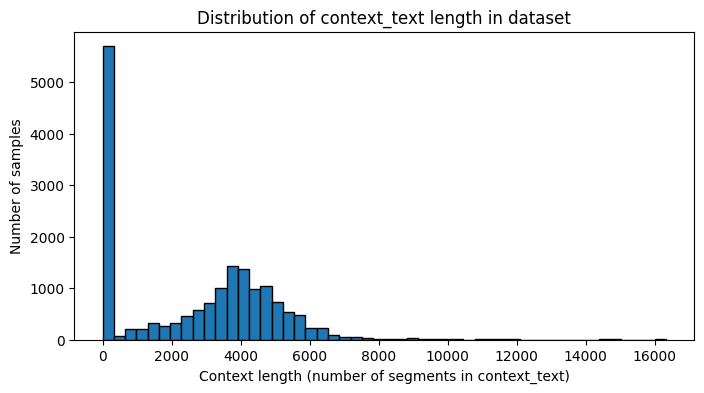

In [96]:
# Calculate the length of context_text for each row
context_lengths = combined_df['context'].apply(len)

plt.figure(figsize=(8, 4))
plt.hist(context_lengths, bins=50, edgecolor='black')
plt.xlabel("Context length (number of segments in context_text)")
plt.ylabel("Number of samples")
plt.title("Distribution of context_text length in dataset")
plt.show()

In [97]:
# Filter rows where context length is 1
short_context_df = combined_df[combined_df["context"].apply(len) == 1]

print(short_context_df.head(5)[["ID", "question", "context"]])

             ID                                           question  \
11505  b33fcee7  Delta in CBOE Data & Access Solutions rev from...   
11506  b8a1383c  CBOE CBA expiring may impact union representat...   
11507  9826209b  Cboe's earnings impact from market data vs reg...   
11508  30eb0cd9  Cboe’s repurchase costs & the impact of its au...   
11509  1a4cebce  Cboe's operational stability, governance in cy...   

                                                 context  
11505  [Cboe Global Markets, Inc. and Subsidiaries\n\...  
11506  [Employees\n\nAs of December 31, 2023, we empl...  
11507  [North\n\n\n\n\n\n\n\n\n\n\nCorporate\n\n\n\n\...  
11508  [In 2011, the Board of Directors approved an i...  
11509  [We maintain policies, procedures and controls...  


In [98]:
# Calculate the length of each answer
answer_lengths = combined_df['answer'].apply(lambda x: len(str(x)) if x is not None else 0)

# Find the minimum answer length
min_length = answer_lengths.min()

# Filter the DataFrame for samples with the shortest answer
shortest_answers_df = combined_df[answer_lengths == min_length]

print(shortest_answers_df[['question', 'answer']].shape)
shortest_answers_df[['question', 'answer']].head(5)

(77, 2)


,question,answer
21,what was the net notional amounts of purchases...,7
140,how much of the oil production is estimated to...,3
316,what was the ratio of the increase in the oper...,8
338,what is the liability for interest and penalti...,0
342,for 2001 what was the net change in aoci in mi...,2


In [99]:
empty_answer_count = combined_df['answer'].apply(lambda x: x is None or (isinstance(x, str) and x.strip() == "")).sum()
print(f"Number of samples with empty answers: {empty_answer_count}")

Number of samples with empty answers: 0


In [100]:
combined_df.shape

(17201, 7)

In [101]:
empty_question_count = combined_df['question'].apply(lambda x: x is None or (isinstance(x, str) and x.strip() == "")).sum()
print(f"Number of samples with empty questions: {empty_question_count}")

Number of samples with empty questions: 0


In [103]:
# number of samples per source
print(combined_df['source'].value_counts())

source
FinQA        6203
FinDER       5696
ConvFinQA    5302
Name: count, dtype: int64


Context Word Count Summary:
count    17201.000000
mean       597.092495
std        368.435665
min          1.000000
25%        323.000000
50%        612.000000
75%        784.000000
max       5263.000000
Name: context_word_count, dtype: float64


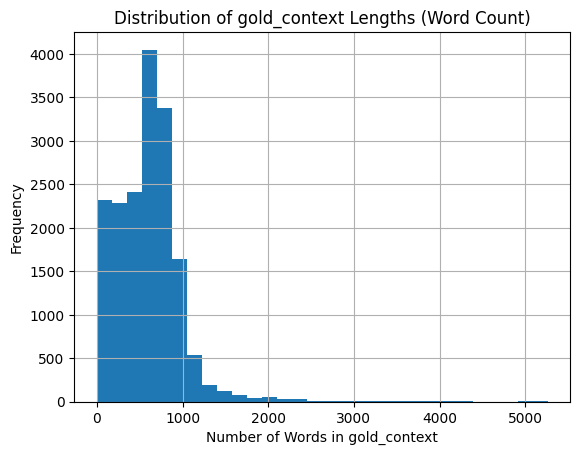

In [122]:
# Compute word count of the gold_context
combined_df['context_word_count'] = combined_df['context'].apply(lambda x: len(str(x).split()))


print("Context Word Count Summary:")
print(combined_df['context_word_count'].describe())

plt.hist(combined_df['context_word_count'], bins=30)
plt.xlabel("Number of Words in gold_context")
plt.ylabel("Frequency")
plt.title("Distribution of gold_context Lengths (Word Count)")
plt.grid(True)
plt.show()

In [123]:
def check_short_gold_context(df, context_col="context_word_count", source_col="source", min_words=5):
    """
    Checks for non-FinDER samples that have gold_context shorter than `min_words`.

    Args:
        df (pd.DataFrame): merged dataframe.
        context_col (str): Column with word count of gold_context.
        source_col (str): Column indicating the source dataset.
        min_words (int): Threshold below which lengths are flagged.

    Returns:
        pd.DataFrame: Subset of suspicious rows.
    """
    if context_col not in df.columns or source_col not in df.columns:
        raise ValueError(f"Columns '{context_col}' and/or '{source_col}' not found in dataframe.")

    # Ensure numeric for context lengths
    df[context_col] = pd.to_numeric(df[context_col], errors="coerce")

    # Identify suspicious rows (non-FinDER with length < min_words)
    suspicious = df[(df[source_col].str.lower() != "finder") & (df[context_col] < min_words)]

    print(f"Total suspicious samples: {len(suspicious)}")
    if len(suspicious) > 0:
        print("Examples:")
        display(suspicious.head(10))

    return suspicious


In [124]:
# Check for contexts shorter than 5 words (except FinDER, which has no gold_context)
affected_rows = check_short_gold_context(combined_df, context_col="context_word_count", source_col="source", min_words=5)


Total suspicious samples: 0


In [ ]:
# Save Merged DF
combined_df.to_json("data/data_processed/merged_dataset.json", orient="records", lines=True)

## 3. Splitting the dataset
To assess the retrievers performance on task that highlight different aspects of a retriever we are performing label-stratified hierarchical splitting. This preserves the statistical power tor per-category metrics while guaranteeing no lexical overlap that ouwld inflate retrieval accuracy. <br>

We define the following task-based labels to characterize the retrieval demands: <br>
- Lookup - targets retrieval precision, requiring direct fact retrieval from a single passage 
- Complex query - it assess the retrievers performance on vague or ambiguous queries 
- Multi-turn - Measures contextual understanding, evaluting how well the retriever incoporates dialogue history in conversational settings 

In addition to these primary categories, we also consider whether a question requires numerical reasoning with more than one input. This flag allows us to isolate retrieval performance in settings where agggregated or compositional evidence is required. This aspect however will not be used controlling the split but for the subsequent evaluation. <br>

Together, this labeling and splitting strategy ensures coverage across a meaningful spectrum of QA difficulty, grounded in the practical demands of financial document question answering. Stratified splitting ensures that each subset (train/test) reflects this diversity and preevnt data leakage. 

In [ ]:
import re
from sklearn.model_selection import StratifiedGroupKFold, GroupShuffleSplit

# ---------- 0) Ensure required columns exist ----------
df = combined_df.copy()

if 'group_id' not in df.columns:
    for cand in ['filename', 'ID', 'doc_id']:
        if cand in df.columns:
            df['group_id'] = df[cand].astype(str)
            break
    else:
        raise ValueError("Need a 'group_id' (e.g., filename/ID) to prevent leakage.")

# ---------- 1) Build task_label and needs_numeric from 'operation' ----------
# Normalize operation to string
op_series = df.get('operation', pd.Series("", index=df.index)).fillna("").astype(str).str.strip()

# definition of what counts as a numeric/compositional operation
OPS_REGEX = re.compile(
    r'\b(add|plus|sum|total|subtract|minu?s|difference|minus|'
    r'multipl(y|ication)|product|times|divide|division|ratio|avg|average|mean|median|'
    r'max|min|greater\s*than|less\s*than|>=|<=|==|!=|and|or|count|percent|percentage)\b'
)

# Heuristic 1: any arithmetic/logical op present → needs_numeric=1
needs_numeric = op_series.str.lower().str.contains(OPS_REGEX)

# Heuristic 2: multiple-step programs (comma-separated ops like "op1(...), op2(...)" or many '#k' refs)
multi_steps = (
    op_series.str.count(r'\)\s*,\s*\w+\(') > 0  # op(...), op2(...)
) | (
    op_series.str.count(r'#\d+') >= 2          # references to multiple intermediate results
)

needs_numeric = (needs_numeric | multi_steps).astype(int)

# task_label: complex if needs_numeric else lookup
df['needs_numeric'] = needs_numeric
df['task_label'] = np.where(df['needs_numeric'].eq(1), 'complex', 'lookup')

# ---------- 2) Build stratification label ----------
df['strat_label'] = df['task_label'].astype(str) + "|num=" + df['needs_numeric'].astype(int).astype(str)

# ---------- 3) Splitter helper ----------
def stratified_group_split_once(X, y, groups, test_size=0.1, random_state=42):
    n = len(X)
    n_splits = max(2, int(round(1 / max(test_size, 1e-6))))
    try:
        sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        best_te, best_gap = None, 1e9
        for tr, te in sgkf.split(X, y, groups):
            gap = abs(len(te)/n - test_size)
            if gap < best_gap:
                best_te, best_gap = te, gap
        mask = np.zeros(n, dtype=bool)
        mask[best_te] = True
        return mask
    except Exception:
        # Fallback: label-wise GroupShuffleSplit
        rng = np.random.RandomState(random_state)
        mask = np.zeros(n, dtype=bool)
        y = np.asarray(y)
        for lbl in np.unique(y):
            sel = (y == lbl)
            idx_lbl = np.flatnonzero(sel)
            groups_lbl = groups[sel]
            gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=rng.randint(0, 1_000_000))
            _, te = next(gss.split(np.zeros(sel.sum()), groups=groups_lbl))
            mask[idx_lbl[te]] = True
        return mask

# ---------- 4) Size: Train df, Test df  ----------
TRAIN_FRAC = 0.70   
TEST_FRAC  = 0.30   
VAL_FRAC   = 0.00   

RANDOM_STATE_TEST  = 42
RANDOM_STATE_TRAIN = 123
RANDOM_STATE_VAL   = 777

# ---------- 5) TEST ----------
X = df.index.to_numpy()
y = df['strat_label'].to_numpy()
g = df['group_id'].to_numpy()

mask_test = stratified_group_split_once(X, y, g, test_size=TEST_FRAC, random_state=RANDOM_STATE_TEST)
test_df   = df.loc[mask_test].copy()
rest_df   = df.loc[~mask_test].copy()

# ---------- 6) TRAIN ----------
train_size_within_rest = TRAIN_FRAC / max(1 - TEST_FRAC, 1e-9)
train_size_within_rest = min(max(train_size_within_rest, 0.0), 1.0)

Xr, yr, gr = rest_df.index.to_numpy(), rest_df['strat_label'].to_numpy(), rest_df['group_id'].to_numpy()
mask_train = stratified_group_split_once(Xr, yr, gr, test_size=train_size_within_rest, random_state=RANDOM_STATE_TRAIN)
train_df = rest_df.loc[mask_train].copy()
pool_df  = rest_df.loc[~mask_train].copy()

# ---------- 7) In case VAL is needed ----------
if VAL_FRAC > 0:
    val_size_within_pool = VAL_FRAC / max(1 - TEST_FRAC - TRAIN_FRAC, 1e-9)
    val_size_within_pool = min(max(val_size_within_pool, 0.0), 1.0)
    Xp, yp, gp = pool_df.index.to_numpy(), pool_df['strat_label'].to_numpy(), pool_df['group_id'].to_numpy()
    mask_val = stratified_group_split_once(Xp, yp, gp, test_size=val_size_within_pool, random_state=RANDOM_STATE_VAL)
    val_df  = pool_df.loc[mask_val].copy()
    hold_df = pool_df.loc[~mask_val].copy()
else:
    val_df  = df.iloc[0:0].copy()
    hold_df = pool_df

print(f"Train: {len(train_df)} | Test: {len(test_df)} | Val: {len(val_df)} | Unused remainder: {len(hold_df)}")

# ---------- 8) Final checks ----------
def check_group_leakage(parts, group_col='group_id'):
    sets = {n: set(p[group_col]) for n, p in parts.items() if len(p)}
    names = list(sets.keys())
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            a, b = names[i], names[j]
            overlap = sets[a] & sets[b]
            assert not overlap, f"Group leakage between {a} and {b}: e.g., {list(overlap)[:5]}"
    print("No group overlap across splits.")

def check_label_balance(df_all, parts, label_col='strat_label'):
    base = df_all[label_col].value_counts(normalize=True).rename('overall')
    print("\nLabel distribution (proportions):")
    for name, part in parts.items():
        if len(part):
            dist = part[label_col].value_counts(normalize=True).rename(name)
            print(pd.concat([base, dist], axis=1).fillna(0).sort_index())

check_group_leakage({'train': train_df, 'test': test_df, 'val': val_df}, 'group_id')
check_label_balance(df, {'train': train_df, 'test': test_df, 'val': val_df}, 'strat_label')

/var/folders/dn/6ts4tw3s5_771t7m76_gjlq40000gn/T/ipykernel_43948/372705307.py:31: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  needs_numeric = op_series.str.lower().str.contains(OPS_REGEX)


Train: 5836 | Test: 5710 | Val: 0 | Unused remainder: 5655
No group overlap across splits.

Label distribution (proportions):
                overall    train
strat_label                     
complex|num=1  0.674147  0.68026
lookup|num=0   0.325853  0.31974
                overall      test
strat_label                      
complex|num=1  0.674147  0.670403
lookup|num=0   0.325853  0.329597


In [111]:
print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 5836, Val: 0, Test: 5710


In [112]:
print("Train split distribution:")
print(train_df['source'].value_counts(normalize=True))  
print(train_df['source'].value_counts())               

print("\nTest split distribution:")
print(test_df['source'].value_counts(normalize=True))
print(test_df['source'].value_counts())

Train split distribution:
source
FinQA        0.360007
FinDER       0.325565
ConvFinQA    0.314428
Name: proportion, dtype: float64
source
FinQA        2101
FinDER       1900
ConvFinQA    1835
Name: count, dtype: int64

Test split distribution:
source
FinQA        0.355342
FinDER       0.332750
ConvFinQA    0.311909
Name: proportion, dtype: float64
source
FinQA        2029
FinDER       1900
ConvFinQA    1781
Name: count, dtype: int64


In [ ]:
train_df.to_json("data/data_processed/Train_Val_Test/df_train.json", orient="records")
test_df.to_json("data/data_processed/Train_Val_Test/df_test.json", orient="records")

In [ ]:
train_df = pd.DataFrame(json.load(open("data/data_processed/Train_Val_Test/df_train.json")))
train_df.head()

,ID,question,answer,context,gold_context,operation,source,needs_numeric,group_id,task_label,strat_label
0,AMT/2012/page_121.pdf,for acquired customer-related and network loca...,7.4,['american tower corporation and subsidiaries ...,{'text_0': 'american tower corporation and sub...,"add(75.0, 72.7), divide(#0, 20)",FinQA,1,AMT/2012/page_121.pdf,complex,complex|num=1
1,GS/2014/page_47.pdf,in 2013 what percentage of total net revenues ...,28%,['management 2019s discussion and analysis inv...,{'table_2': '$ in millions the debt securities...,"divide(1947, 7018)",FinQA,1,GS/2014/page_47.pdf,complex,complex|num=1
2,AAL/2014/page_89.pdf,what percentage of total reorganization items ...,65.6%,"['table of contents interest expense , net of ...",{'table_1': 'the labor-related deemed claim ( ...,"divide(1733, 2640)",FinQA,1,AAL/2014/page_89.pdf,complex,complex|num=1
3,GS/2014/page_134.pdf,"in millions between 2014 and 2013 , what was t...",13588,['notes to consolidated financial statements d...,{'table_1': '$ in millions the net derivative ...,"subtract(35764, 22176)",FinQA,1,GS/2014/page_134.pdf,complex,complex|num=1
4,STT/2012/page_42.pdf,what is the cumulative total shareholder retur...,56%,"[""shareholder return performance presentation ...",{'table_1': 'the state street corporation of 2...,"divide(61, 109)",FinQA,1,STT/2012/page_42.pdf,complex,complex|num=1
